<a href="https://colab.research.google.com/github/Teja220/EDA/blob/main/21BDS0277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Teja220/EDA.git


Cloning into 'EDA'...


# Module 1

First 5 rows of the dataset:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

Summary statistics for numerical

<ipython-input-3-9e52db89de25>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


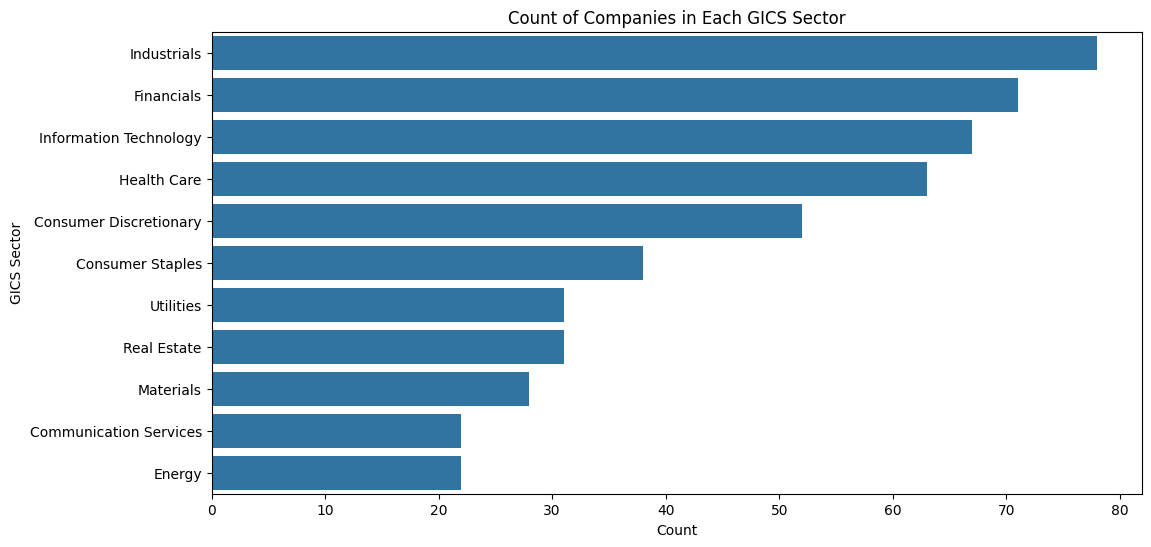


Value counts for 'GICS Sector' column (Nominal scale example):
GICS Sector
Industrials               78
Financials                71
Information Technology    67
Health Care               63
Consumer Discretionary    52
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64

Software Tools for EDA:
Python: Pandas, Seaborn, Matplotlib
R: GGPlot2, dplyr, tidyr
Excel/Tableau: For basic EDA tasks


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Loading the Dataset from the Excel file
file_path = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
df = pd.read_excel(file_path, sheet_name="EDA")

print("First 5 rows of the dataset:")
print(df.head())

# 2. Summary Statistics for Numerical and Categorical Data
print("\nSummary statistics for numerical data:")
print(df.describe())  # Summary for numerical features

# Checking for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

# Summary for categorical columns
if len(categorical_cols) > 0:
    print("\nSummary for categorical columns:")
    print(df[categorical_cols].describe())

# 3. Data Cleaning (Handling Missing Values)
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Dropping rows with missing data
df_cleaned = df.dropna()
print("\nData after dropping missing values:")
print(df_cleaned.head())

# Filling missing data using forward fill
df_filled = df.fillna(method='ffill')
print("\nData after forward fill:")
print(df_filled.head())

# 4. Visualization (for Numerical and Categorical Data)
# Count plot for GICS Sectors (Categorical data)
plt.figure(figsize=(12, 6))
sns.countplot(y=df['GICS Sector'], order=df['GICS Sector'].value_counts().index)
plt.title('Count of Companies in Each GICS Sector')
plt.xlabel('Count')
plt.ylabel('GICS Sector')
plt.show()

# Histogram for Founded Year
if 'Founded' in df.columns and pd.api.types.is_numeric_dtype(df['Founded']):
    plt.figure(figsize=(8, 6))
    df['Founded'].hist(bins=20)
    plt.title('Histogram of Founded Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

# 5. Measurement Scales (Nominal, Ordinal, Interval, Ratio)
# Nominal Scale Example: GICS Sector
print("\nValue counts for 'GICS Sector' column (Nominal scale example):")
print(df['GICS Sector'].value_counts())

# Ordinal Scale Example: Creating a ranking based on Founded Year
if 'Founded' in df.columns and pd.api.types.is_numeric_dtype(df['Founded']):
    df['Company Age Category'] = pd.qcut(df['Founded'], 5, labels=['Very Old', 'Old', 'Moderate', 'New', 'Very New'])
    print("\nFirst 5 rows with 'Company Age Category' (Ordinal scale example):")
    print(df[['Founded', 'Company Age Category']].head())

# 6. Comparing EDA with Classical and Bayesian Analysis
# Classical Analysis (T-test on Founded Year, assuming normality)
if 'Founded' in df.columns and pd.api.types.is_numeric_dtype(df['Founded']):
    t_stat, p_value = stats.ttest_1samp(df['Founded'].dropna(), popmean=1950)
    print(f"\nT-test on Founded Year: t-stat = {t_stat}, p-value = {p_value}")


# 7. Software Tools for EDA
print("\nSoftware Tools for EDA:")
print("Python: Pandas, Seaborn, Matplotlib")
print("R: GGPlot2, dplyr, tidyr")
print("Excel/Tableau: For basic EDA tasks")


# Module 2

First 5 rows of the dataset:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1               Building Products     Milwaukee, Wisconsin 2017-07-26   
2           Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                   Biotechnology  North Chicago, Illinois 2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland 2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

Shape before deduplication: (503

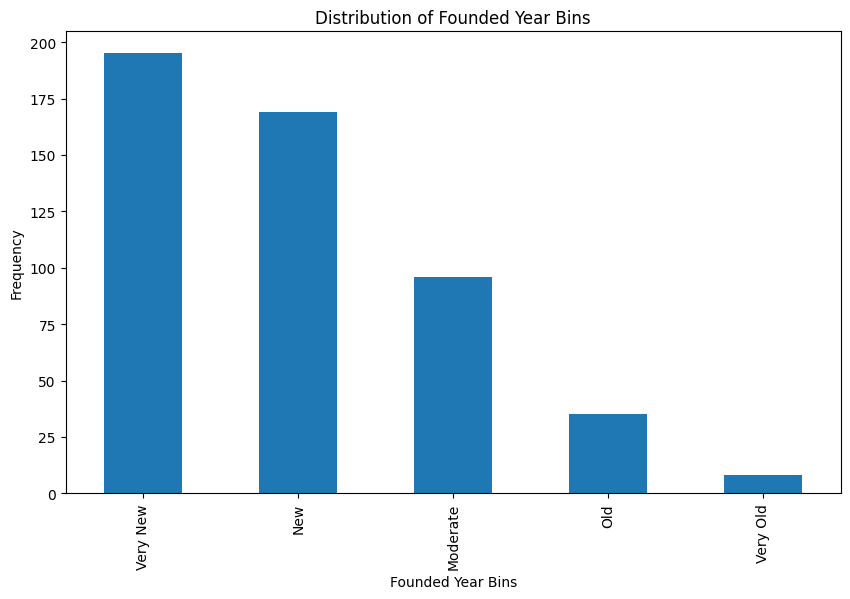

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# 1. Loading the Dataset
file_path = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
df = pd.read_excel(file_path, sheet_name="EDA")

print("First 5 rows of the dataset:")
print(df.head())

# 2. Data Deduplication
print("\nShape before deduplication:", df.shape)
df_deduped = df.drop_duplicates()
print("Shape after deduplication:", df_deduped.shape)

# 3. Replacing Values
# Replace specific values in a column (Example: Replace 'Unknown' in 'Founded' with NaN)
df_replaced = df.copy()
df_replaced['Founded'] = pd.to_numeric(df_replaced['Founded'], errors='coerce')  # Convert to numeric, forcing errors to NaN

# Replace NaN values with the mean of the column (if numeric)
if pd.api.types.is_numeric_dtype(df_replaced['Founded']):
    df_replaced.fillna(value={'Founded': df_replaced['Founded'].mean()}, inplace=True)

print("\nFounded column after replacing 'Unknown' with NaN and filling NaN with mean:")
print(df_replaced[['Founded']].head())

# 4. Discretization and Binning
df_binned = df.copy()  # Define df_binned to avoid NameError
df_binned['Founded'] = pd.to_numeric(df_binned['Founded'], errors='coerce')

if pd.api.types.is_numeric_dtype(df_binned['Founded']):
    df_binned['Founded_binned'] = pd.cut(df_binned['Founded'].fillna(df_binned['Founded'].mean()), bins=5,
                                         labels=['Very Old', 'Old', 'Moderate', 'New', 'Very New'])
    print("\nBinned 'Founded' column:")
    print(df_binned[['Founded', 'Founded_binned']].head())

# 5. Handling Missing Data - Traditional Method (Maximum Likelihood Estimation)
df_with_na = df.copy()
df_with_na['Founded'] = pd.to_numeric(df_with_na['Founded'], errors='coerce')  # Convert to numeric
df_with_na.loc[10:15, 'Founded'] = np.nan  # Introduce missing values for demonstration

# Handle missing data using SimpleImputer (Mean imputation as an MLE approximation)
if pd.api.types.is_numeric_dtype(df_with_na['Founded']):
    imputer = SimpleImputer(strategy='mean')
    df_with_na['Founded'] = imputer.fit_transform(df_with_na[['Founded']])

print("\nFounded column after imputing missing values using MLE approximation (mean):")
print(df_with_na[['Founded']].head(20))

# 6. Discretization with KBinsDiscretizer
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')  # Ensure 'Founded' is numeric
if pd.api.types.is_numeric_dtype(df['Founded']):
    kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    df['Founded_binned_kbins'] = kbins.fit_transform(df[['Founded']].fillna(df['Founded'].mean()))
    print("\nDiscretized 'Founded' column using KBinsDiscretizer:")
    print(df[['Founded', 'Founded_binned_kbins']].head())

# 7. Visualizing Binned Data
if 'Founded_binned' in df_binned.columns and pd.api.types.is_numeric_dtype(df_binned['Founded']):
    plt.figure(figsize=(10, 6))
    df_binned['Founded_binned'].value_counts().plot(kind='bar')
    plt.title('Distribution of Founded Year Bins')
    plt.xlabel('Founded Year Bins')
    plt.ylabel('Frequency')
    plt.show()


# Module 3

Univariate Analysis (Summary Statistics):
                          Date added           CIK      Founded
count                            503  5.030000e+02   461.000000
mean   2001-06-01 20:13:50.218687872  8.217536e+05  1952.097614
min              1957-03-04 00:00:00  1.800000e+03  1784.000000
25%              1992-08-16 00:00:00  1.005050e+05  1919.000000
50%              2008-03-31 00:00:00  9.000750e+05  1968.000000
75%              2017-03-16 12:00:00  1.175188e+06  1992.000000
max              2024-07-08 00:00:00  2.005951e+06  2024.000000
std                              NaN  5.665200e+05    48.390005


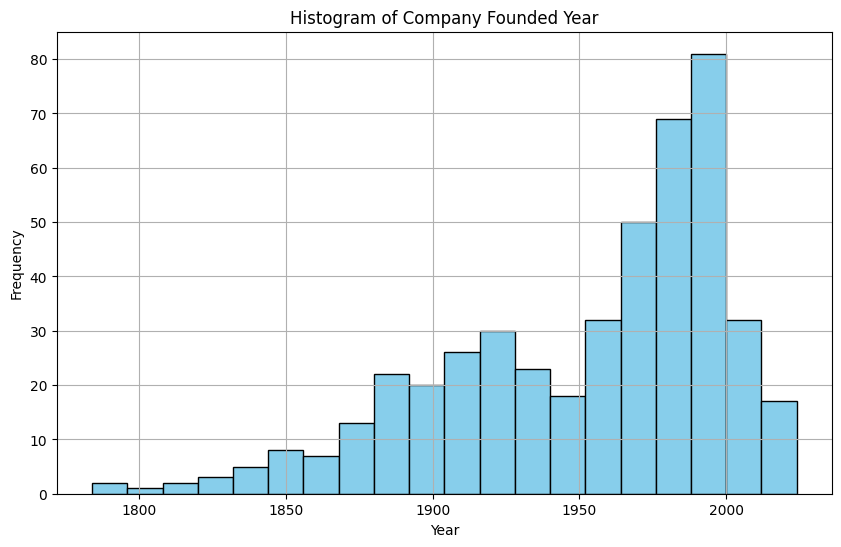


Bivariate Analysis (Correlation Matrix):
              CIK   Founded
CIK      1.000000  0.475457
Founded  0.475457  1.000000


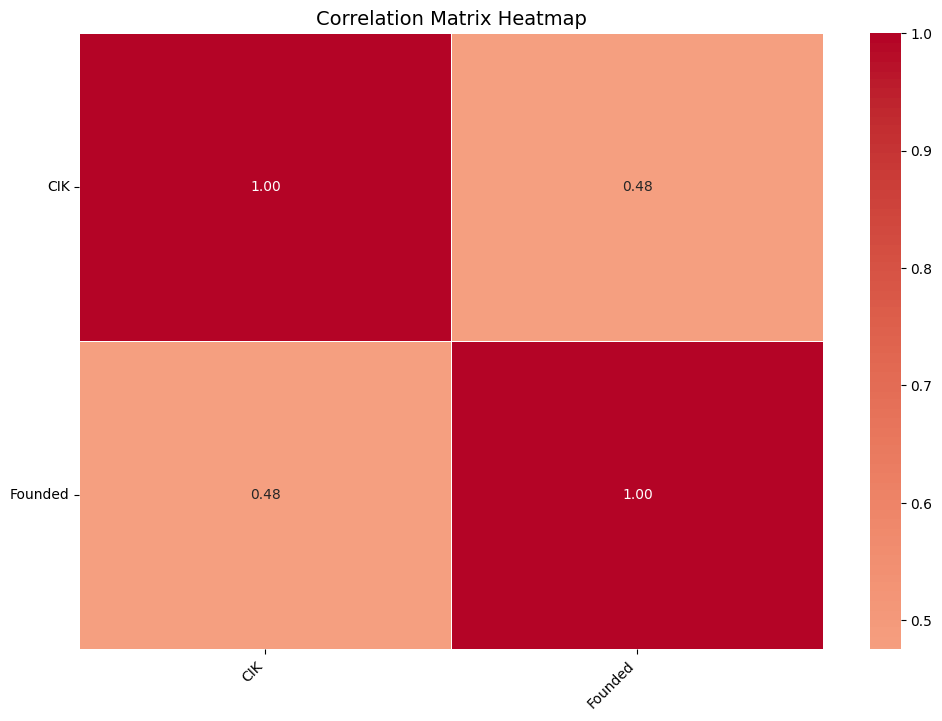

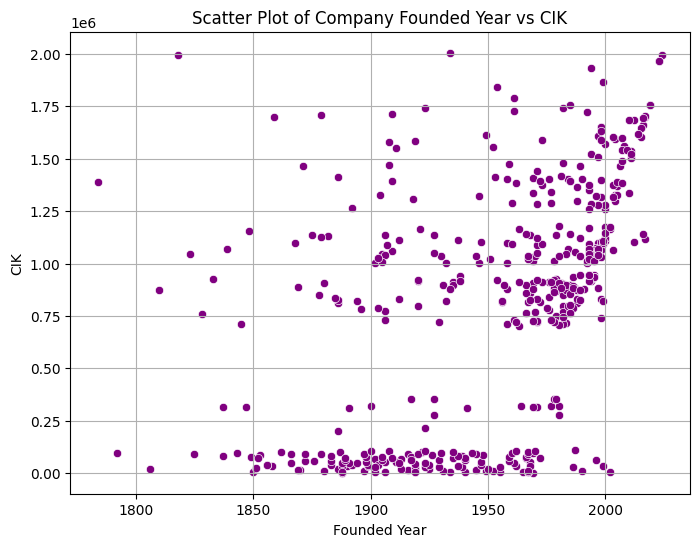

<Figure size 1400x1000 with 0 Axes>

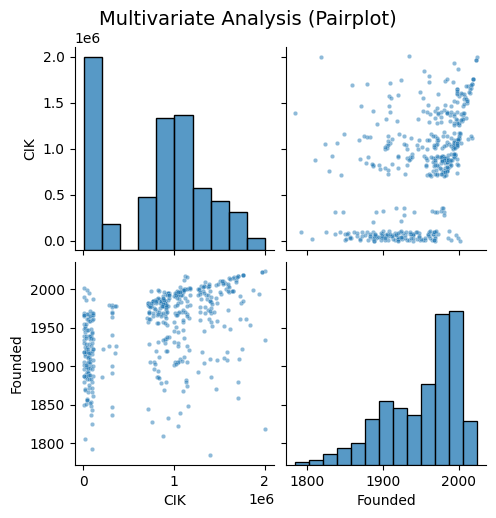

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/Teja220/EDA/main/EDA.xlsx"
df = pd.read_excel(url, sheet_name="EDA")

# Convert 'Founded' to numeric (forcing errors to NaN)
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# 1. Univariate Analysis
print("Univariate Analysis (Summary Statistics):")
print(df.describe())

# Visualizing Univariate Data (Histogram for Founded Year)
if 'Founded' in df.columns and pd.api.types.is_numeric_dtype(df['Founded']):
    plt.figure(figsize=(10, 6))
    df['Founded'].dropna().hist(bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Company Founded Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 2. Bivariate Analysis (Correlation Matrix)
print("\nBivariate Analysis (Correlation Matrix):")
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    print(correlation_matrix)

    # Heatmap of Correlation Matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", center=0)
    plt.title('Correlation Matrix Heatmap', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Scatter Plot for Bivariate Analysis (Founded vs CIK)
if 'Founded' in df.columns and 'CIK' in df.columns and pd.api.types.is_numeric_dtype(df['Founded']):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Founded'], y=df['CIK'], color='purple')
    plt.title('Scatter Plot of Company Founded Year vs CIK')
    plt.xlabel('Founded Year')
    plt.ylabel('CIK')
    plt.grid(True)
    plt.show()

# 3. Multivariate Analysis
# Convert 'Founded' to numeric (forcing errors to NaN)
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# Selecting numerical columns for pairplot
numerical_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numerical_cols].dropna()  # Drop missing values to avoid errors

# Generate the Pairplot
plt.figure(figsize=(14, 10))  # Set figure size
sns.pairplot(df_numeric, diag_kind="hist", plot_kws={'s': 10, 'alpha': 0.5})  # Set scatter plot properties
plt.suptitle("Multivariate Analysis (Pairplot)", fontsize=14, y=1.02)  # Title
plt.show()

